# Image Classification with tf_flower dataset

In [1]:
import tensorflow as tf
import tensorflow_datasets as tfds
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [2]:
# Load the dataset
dataset, info = tfds.load("tf_flowers", split="train", as_supervised=True, with_info=True)

# Get class names
class_names = info.features["label"].names

pd.DataFrame(class_names)

,0
0,dandelion
1,daisy
2,tulips
3,sunflowers
4,roses


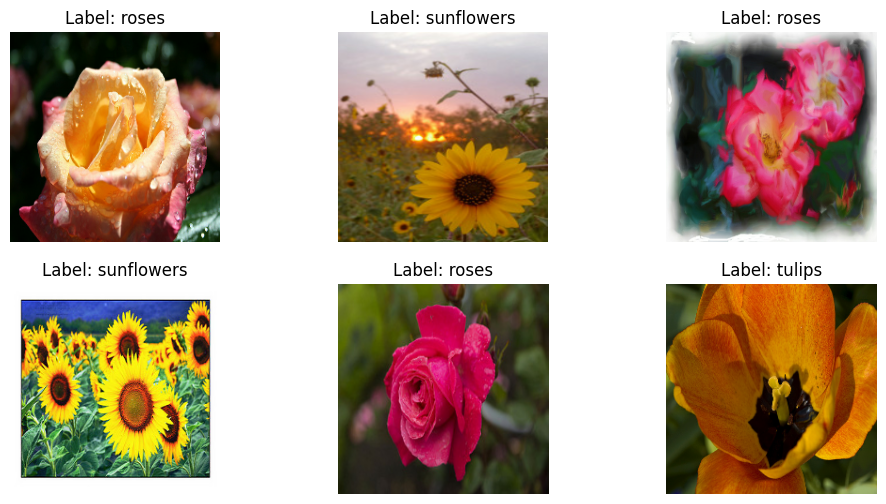

In [3]:
# Define image size
IMG_SIZE = (224, 224)

# Corrected preprocessing function
def preprocess(image, label):
    image = tf.image.resize(image, IMG_SIZE)  # Resize to 224x224
    image = tf.cast(image, tf.float32) / 255.0  # Normalize correctly to [0,1]
    return image, label

# Apply preprocessing
dataset = dataset.map(preprocess)

# Split dataset into training (80%) and testing (20%)
train_size = int(0.8 * info.splits["train"].num_examples)
train_ds = dataset.take(train_size).shuffle(1000).batch(32)
test_ds = dataset.skip(train_size).batch(32)

# Function to display images
def show_samples(dataset, num_images=6):
    plt.figure(figsize=(12, 6))
    for i, (image, label) in enumerate(dataset.unbatch().take(num_images)):
        plt.subplot(2, 3, i + 1)
        plt.imshow(image.numpy())  # Put values in [0,1]
        plt.title(f"Label: {class_names[label.numpy()]}")
        plt.axis("off")
    plt.show()

# Display images
show_samples(train_ds)
